In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
""

''

In [193]:
# Read the TSV file into a DataFrame
file_path = '/content/chipotle.tsv'  # Replace with the actual path to your file
chipotle_df = pd.read_csv(file_path, sep='\t')



1. Missing Values:
Question: Check for missing values in each column (Order ID, Quantity, Item Name, Choice Description, Item Price). How should missing values be handled?


In [194]:
# Check for missing values in each column
missing_values = chipotle_df.isnull().sum()

# Print the count of missing values for each column
print("Missing Values in Each Column:")
print(missing_values)

# Example: Handling missing values by filling them with a default value (e.g., "Unknown")
# Replace NaN values in 'Choice Description' column with "Unknown"
chipotle_df['choice_description'].fillna('Unknown', inplace=True)

# Verify that the missing values have been handled
print("\nAfter Handling Missing Values:")
print(chipotle_df.isnull().sum())

Missing Values in Each Column:
order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

After Handling Missing Values:
order_id              0
quantity              0
item_name             0
choice_description    0
item_price            0
dtype: int64


2. Data Types:
Question: Verify the data types of each column. Do they align with their expected types, and should any adjustments be made?


In [195]:
# Display the data types of each column
print("Data Types of Each Column:")
print(chipotle_df.dtypes)

# Example: Adjusting data types if needed
# Convert 'Item Price' to a numeric type (assuming it represents a price)
chipotle_df['item_price'] = chipotle_df['item_price'].str.replace('$', '').astype(float)

# Verify the adjusted data types
print("\nAfter Adjusting Data Types:")
print(chipotle_df.dtypes)


Data Types of Each Column:
order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

After Adjusting Data Types:
order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object


<ipython-input-195-4cf4d9d9ed7f>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  chipotle_df['item_price'] = chipotle_df['item_price'].str.replace('$', '').astype(float)


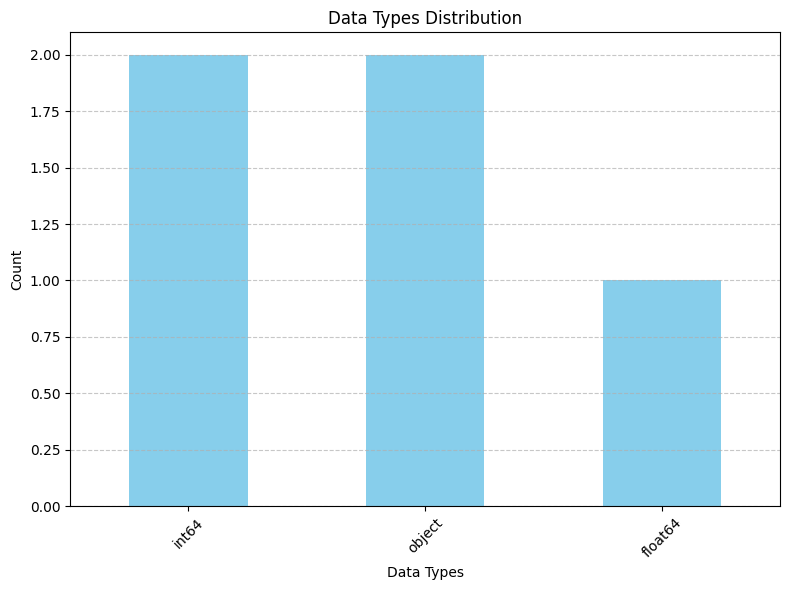

In [196]:
# Visualize data types using a bar plot
data_types_counts = chipotle_df.dtypes.value_counts()

plt.figure(figsize=(8, 6))
data_types_counts.plot(kind='bar', color='skyblue')
plt.title('Data Types Distribution')
plt.xlabel('Data Types')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

3. Duplicated Entries:
Question: Identify and handle duplicated entries in the dataset. How might duplicates impact analysis, and what is the appropriate action?



In [197]:
# Identify duplicated entries
duplicated_entries = chipotle_df[chipotle_df.duplicated()]

In [198]:

# Print the count of duplicated entries
print("Number of Duplicated Entries:", len(duplicated_entries))

Number of Duplicated Entries: 59


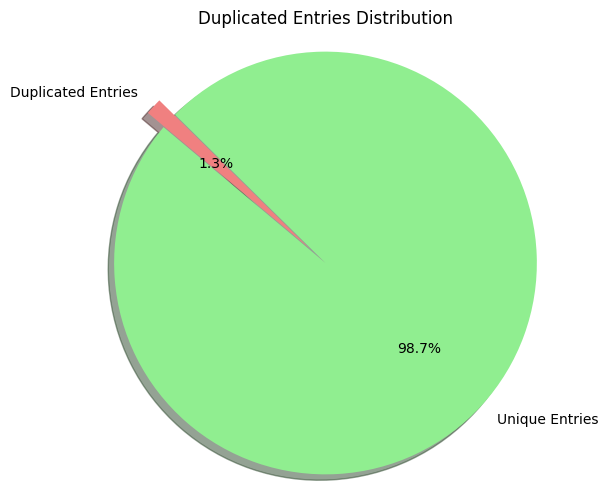

In [199]:
# Visualize duplicated entries using a pie chart
labels = ['Unique Entries', 'Duplicated Entries']
sizes = [len(chipotle_df) - len(duplicated_entries), len(duplicated_entries)]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)  # explode the 1st slice (Unique Entries)

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Duplicated Entries Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [200]:
# Remove duplicated entries
chipotle_df.drop_duplicates(inplace=True)

# Verify that duplicates have been removed
print("\nAfter Removing Duplicates:")
print("Number of Unique Entries:", len(chipotle_df))


After Removing Duplicates:
Number of Unique Entries: 4563


4. Quantity and Item Price:
Question: Examine the Quantity and Item Price columns. Are there any inconsistencies or anomalies that need correction?


In [201]:
# Check data types of Quantity and Item Price columns
print("Data Types:")
print(chipotle_df[['quantity', 'item_price']].dtypes)

Data Types:
quantity        int64
item_price    float64
dtype: object


In [202]:
# Check for anomalies in Quantity and Item Price columns
print("\nAnomalies in Quantity:")
print(chipotle_df[chipotle_df['quantity'] < 0])


Anomalies in Quantity:
Empty DataFrame
Columns: [order_id, quantity, item_name, choice_description, item_price]
Index: []


In [203]:
print("\nAnomalies in Item Price:")
print(chipotle_df[chipotle_df['item_price'] <= 0])


Anomalies in Item Price:
Empty DataFrame
Columns: [order_id, quantity, item_name, choice_description, item_price]
Index: []



Summary Statistics:
          quantity   item_price
count  4563.000000  4563.000000
mean      1.076704     7.490083
std       0.412739     4.244155
min       1.000000     1.090000
25%       1.000000     3.750000
50%       1.000000     8.750000
75%       1.000000     9.250000
max      15.000000    44.250000


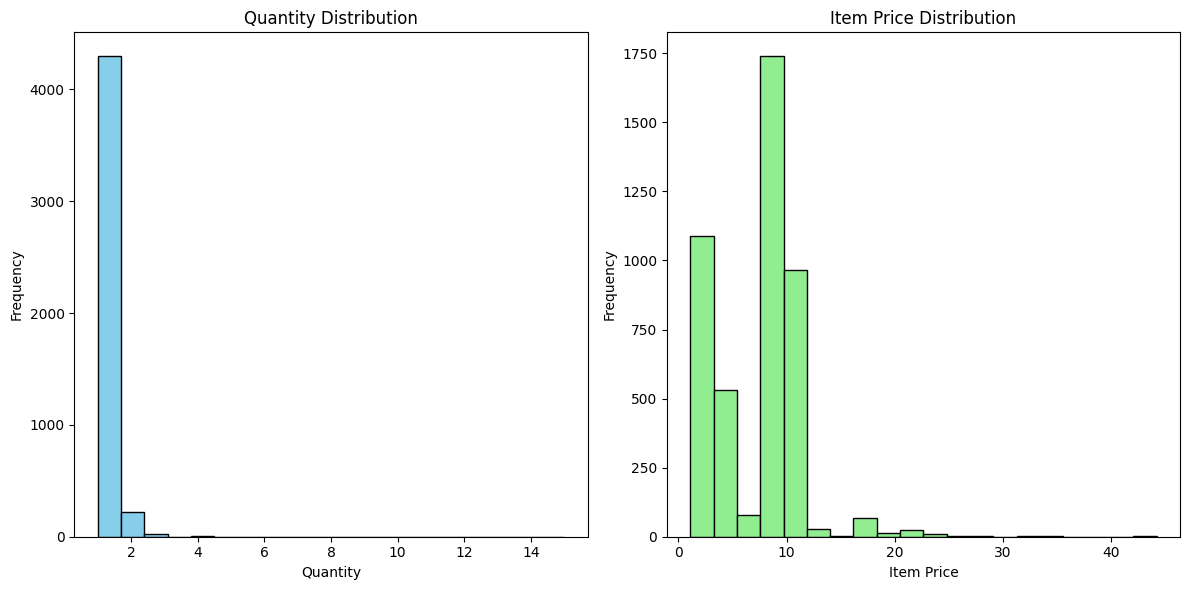

In [204]:
# Summary statistics for Quantity and Item Price columns
print("\nSummary Statistics:")
print(chipotle_df[['quantity', 'item_price']].describe())

# Visualize distributions of Quantity and Item Price
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
chipotle_df['quantity'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Quantity Distribution')
plt.xlabel('Quantity')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
chipotle_df['item_price'].plot(kind='hist', bins=20, color='lightgreen', edgecolor='black')
plt.title('Item Price Distribution')
plt.xlabel('Item Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

5. Choice Description:
Question: Analyze the Choice Description column. How should choices be handled, especially when there are multiple descriptions for a single item?


In [205]:
# Separate each choice description into individual choices
choices = chipotle_df['choice_description'].str.split(', ')


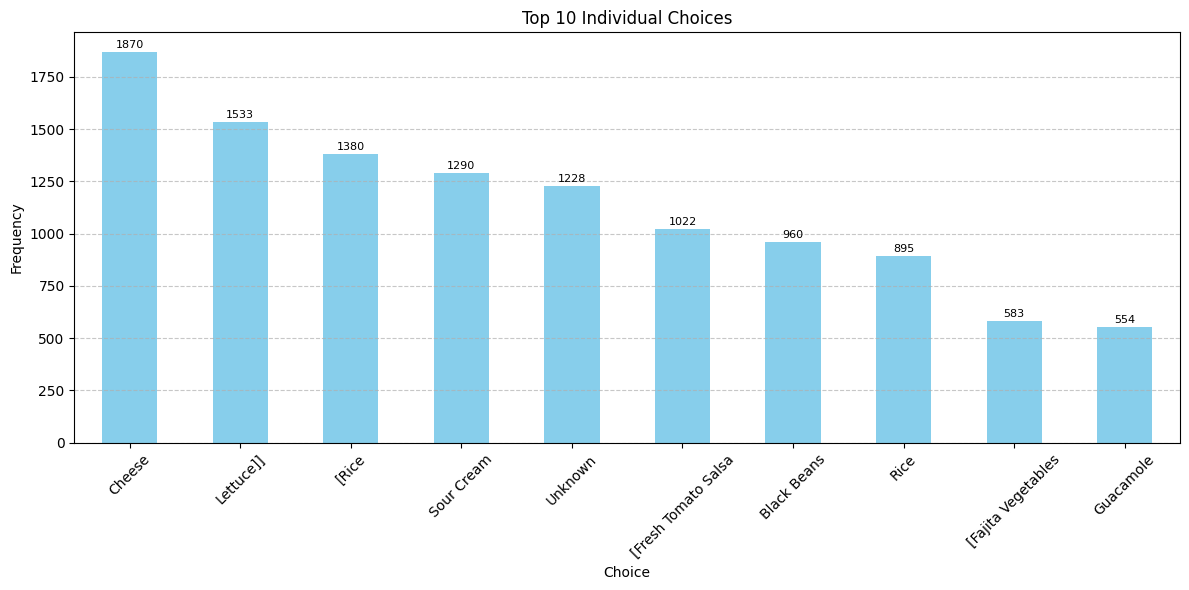

In [206]:
# Create a new DataFrame with each choice as a separate row
choices_df = choices.explode().reset_index(drop=True)

# Visualize the frequency of each choice using a bar plot
plt.figure(figsize=(12, 6))
top_choices = choices_df.value_counts().head(10)
top_choices.plot(kind='bar', color='skyblue')

plt.title('Top 10 Individual Choices')
plt.xlabel('Choice')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding labels to the bars
for i, v in enumerate(top_choices):
    plt.text(i, v + 10, str(v), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


6. Handling Special Characters:
Question: Check for special characters in text-based columns (e.g., Item Name, Choice Description). How can these be addressed for consistency?


In [207]:
import re

In [208]:
# Check for special characters in the Item Name column
special_characters_pattern = r'[^a-zA-Z0-9\s]'  # Define a pattern for special characters
has_special_characters = chipotle_df['item_name'].str.contains(special_characters_pattern, regex=True)

# Print rows with special characters in the Item Name column
print("Rows with Special Characters in Item Name:")
print(chipotle_df[has_special_characters]['item_name'])

# Remove or replace special characters in the Item Name column (example: replacing non-alphanumeric characters with a space)
chipotle_df['item_name'] = chipotle_df['item_name'].str.replace(special_characters_pattern, ' ')

# Normalize the text in the Item Name column (example: converting to lowercase)
chipotle_df['item_name'] = chipotle_df['item_name'].str.lower()

# Verify consistency
print("\nAfter Handling Special Characters:")
print(chipotle_df['item_name'].head(10))

Rows with Special Characters in Item Name:
3       Chips and Tomatillo-Green Chili Salsa
15      Chips and Tomatillo-Green Chili Salsa
30      Chips and Tomatillo-Green Chili Salsa
113     Chips and Tomatillo-Green Chili Salsa
133     Chips and Tomatillo-Green Chili Salsa
                        ...                  
3810    Chips and Tomatillo-Green Chili Salsa
3871    Chips and Tomatillo-Green Chili Salsa
3905       Chips and Roasted Chili-Corn Salsa
4007    Chips and Tomatillo-Green Chili Salsa
4088      Chips and Tomatillo-Red Chili Salsa
Name: item_name, Length: 68, dtype: object

After Handling Special Characters:
0             chips and fresh tomato salsa
1                                     izze
2                         nantucket nectar
3    chips and tomatillo green chili salsa
4                             chicken bowl
5                             chicken bowl
6                            side of chips
7                            steak burrito
8                         st

<ipython-input-208-a21793801ba8>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  chipotle_df['item_name'] = chipotle_df['item_name'].str.replace(special_characters_pattern, ' ')


7. Order Id Integrity:
Question: Cross-reference the Order ID column for integrity. Are there any irregularities or patterns that need validation?


In [209]:
# Check for unique Order IDs
unique_order_ids = chipotle_df['order_id'].nunique()
total_order_ids = chipotle_df.shape[0]

# Print the number of unique Order IDs and total Order IDs
print("Number of Unique Order IDs:", unique_order_ids)
print("Total Order IDs:", total_order_ids)

# Check for non-numeric or irregularly formatted Order IDs
non_numeric_order_ids = chipotle_df[~chipotle_df['order_id'].astype(str).str.isdigit()]['order_id']
print("\nNon-Numeric or Irregularly Formatted Order IDs:")
print(non_numeric_order_ids)


Number of Unique Order IDs: 1834
Total Order IDs: 4563

Non-Numeric or Irregularly Formatted Order IDs:
Series([], Name: order_id, dtype: int64)


8. Item Name Standardization:
Question: Standardize the Item Name column. Are there variations that can be unified for better analysis?



Item Name After Standardization:
                                  item_name  \
0              chips and fresh tomato salsa   
1                                      izze   
2                          nantucket nectar   
3     chips and tomatillo green chili salsa   
4                              chicken bowl   
...                                     ...   
4617                          steak burrito   
4618                          steak burrito   
4619                     chicken salad bowl   
4620                     chicken salad bowl   
4621                     chicken salad bowl   

                     item_name_standardized  
0              chips and fresh tomato salsa  
1                                      izze  
2                          nantucket nectar  
3     chips and tomatillo green chili salsa  
4                              chicken bowl  
...                                     ...  
4617                          steak burrito  
4618                          ste

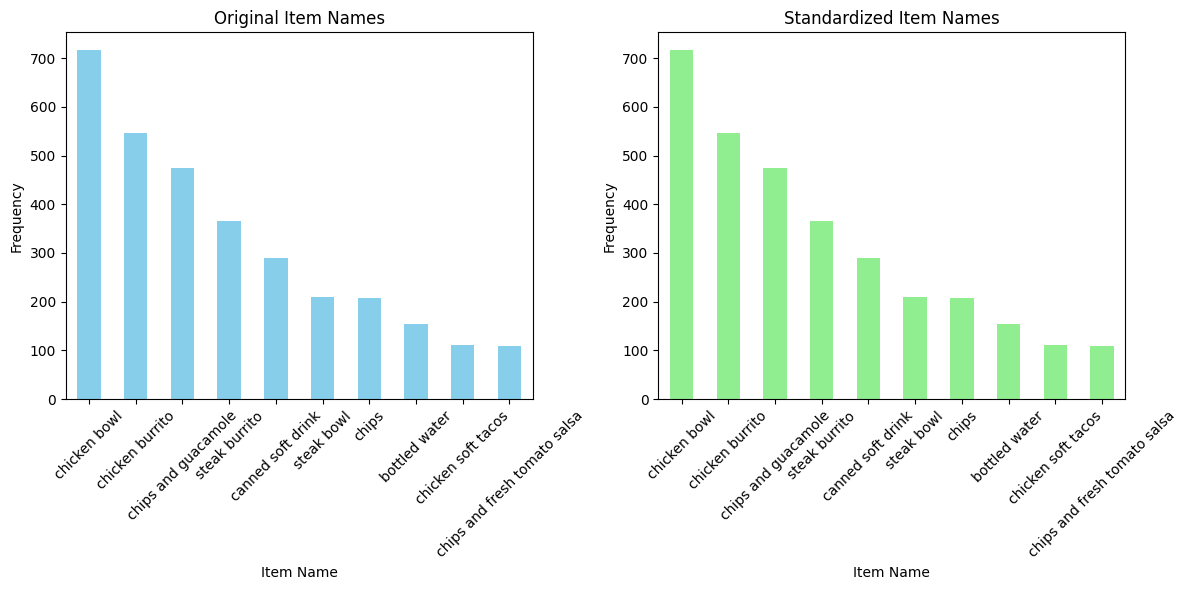

In [210]:
# Identify variations in the Item Name column
item_name_variations = chipotle_df['item_name'].value_counts()

# Create a mapping for standardization
name_mapping = {
    'Chips and Fresh Tomato Salsa': 'Chips and Salsa',
    'Chips and Tomatillo-Green Chili Salsa': 'Chips and Salsa',
    'Chips and Guacamole': 'Chips and Guac',
    'Chicken Bowl': 'Chicken Burrito Bowl',
    'Side of Chips': 'Chips',
    # Add more mappings as needed based on your observations
}

# Apply standardization using the mapping
chipotle_df['item_name_standardized'] = chipotle_df['item_name'].replace(name_mapping)

# Verify standardization
print("\nItem Name After Standardization:")
print(chipotle_df[['item_name', 'item_name_standardized']])

# Visualize the frequency of each item name before and after standardization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
item_name_variations.head(10).plot(kind='bar', color='skyblue')
plt.title('Original Item Names')
plt.xlabel('Item Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
chipotle_df['item_name_standardized'].value_counts().head(10).plot(kind='bar', color='lightgreen')
plt.title('Standardized Item Names')
plt.xlabel('Item Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

9. Quantity and Price Relationships:
Question: Investigate the relationships between Quantity and Item Price. Are there cases where adjustments need to be made for accurate analysis?


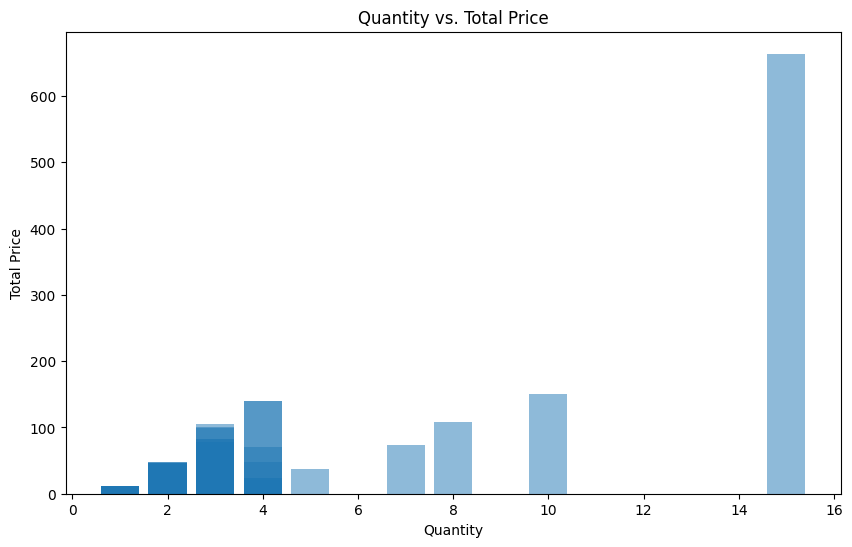

Rows with Zero or Negative Values:
Empty DataFrame
Columns: [order_id, quantity, item_name, choice_description, item_price, item_name_standardized, Total Price]
Index: []


In [211]:
chipotle_df['Total Price'] = chipotle_df['quantity'] * chipotle_df['item_price']

# Visualize Quantity vs. Total Price
plt.figure(figsize=(10, 6))
plt.bar(chipotle_df['quantity'], chipotle_df['Total Price'], alpha=0.5)
plt.title('Quantity vs. Total Price')
plt.xlabel('Quantity')
plt.ylabel('Total Price')
plt.show()

# Check for zero or negative values in Quantity or Item Price
zero_negative_values = chipotle_df[(chipotle_df['quantity'] <= 0) | (chipotle_df['item_price'] <= 0)]
print("Rows with Zero or Negative Values:")
print(zero_negative_values)

10. Data Integrity Check:
Question: Perform a data integrity check by ensuring that quantities and prices align with the corresponding items and descriptions.


In [212]:


# Assuming you have a DataFrame named chipotle_df with columns 'Item Name', 'Choice Description' (if applicable), 'Quantity', and 'Item Price'
# Group by 'Item Name' and 'Choice Description' and calculate aggregated quantities and prices
grouped_data = chipotle_df.groupby(['item_name', 'choice_description']).agg(
    Total_Quantity=('quantity', 'sum'),
    Total_Price=('item_price', lambda x: (x * chipotle_df['quantity']).sum())
).reset_index()

# Merge the aggregated data back to the original DataFrame
merged_df = pd.merge(chipotle_df, grouped_data, on=['item_name', 'choice_description'], suffixes=('', '_agg'))

# Check for alignment between original and aggregated quantities and prices
data_integrity_check = merged_df[
    (merged_df['quantity'] != merged_df['Total_Quantity']) |
    (merged_df['item_price'] != merged_df['Total_Price'])
]

print("Rows with Quantity or Price Mismatch:")
print(data_integrity_check)


Rows with Quantity or Price Mismatch:
      order_id  quantity                     item_name  \
0            1         1  chips and fresh tomato salsa   
1           13         1  chips and fresh tomato salsa   
2           25         1  chips and fresh tomato salsa   
3           39         1  chips and fresh tomato salsa   
4           82         1  chips and fresh tomato salsa   
...        ...       ...                           ...   
4478      1719         2                 steak burrito   
4514      1764         2                  chicken bowl   
4515      1764         2                    steak bowl   
4559      1830         1                 steak burrito   
4560      1833         1                 steak burrito   

                                     choice_description  item_price  \
0                                               Unknown        2.39   
1                                               Unknown        2.39   
2                                               Unkn

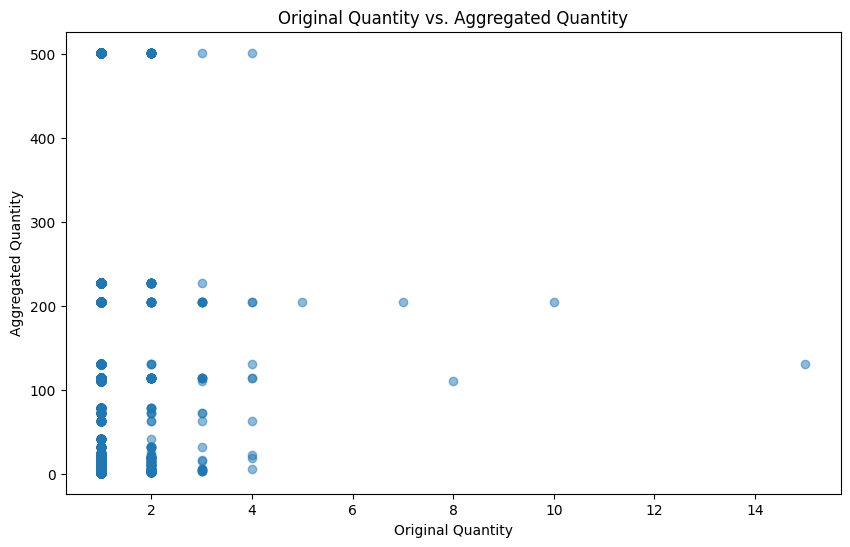

In [213]:
# Create a scatter plot to visualize quantity discrepancies
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['quantity'], merged_df['Total_Quantity'], alpha=0.5)
plt.title('Original Quantity vs. Aggregated Quantity')
plt.xlabel('Original Quantity')
plt.ylabel('Aggregated Quantity')
plt.show()



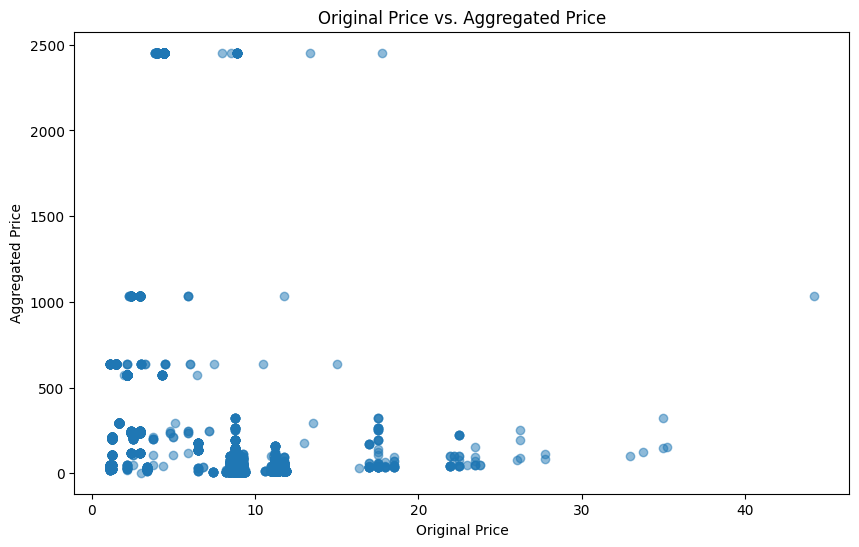

In [214]:
# Create a scatter plot to visualize price discrepancies
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['item_price'], merged_df['Total_Price'], alpha=0.5)
plt.title('Original Price vs. Aggregated Price')
plt.xlabel('Original Price')
plt.ylabel('Aggregated Price')
plt.show()

11. Converting to CSV:
Optional Question: If needed, convert the cleaned dataset to a CSV file using the to_csv function with sep=','.


In [215]:
# Assuming you have a cleaned DataFrame named chipotle_df
# Convert the cleaned DataFrame to a CSV file
output_file_path = '/content/chipotle.csv'  # Replace with the desired output file path

# Save the cleaned DataFrame to a CSV file with comma as the separator
chipotle_df.to_csv(output_file_path, index=False, sep=',')

print(f"The cleaned dataset has been saved to: {output_file_path}")


The cleaned dataset has been saved to: /content/chipotle.csv


12. Handling Categorical Data:
Question: For categorical columns (e.g., Item Name), consider encoding or transforming them into a format suitable for analysis.


In [216]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
chipotle_df['Item Name Encoded'] = label_encoder.fit_transform(chipotle_df['item_name'])
chipotle_df

,order_id,quantity,item_name,choice_description,item_price,item_name_standardized,Total Price,Item Name Encoded
0,1,1,chips and fresh tomato salsa,Unknown,2.39,chips and fresh tomato salsa,2.39,24
1,1,1,izze,[Clementine],3.39,izze,3.39,31
2,1,1,nantucket nectar,[Apple],3.39,nantucket nectar,3.39,32
3,1,1,chips and tomatillo green chili salsa,Unknown,2.39,chips and tomatillo green chili salsa,2.39,28
4,2,2,chicken bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,chicken bowl,33.96,17
...,...,...,...,...,...,...,...,...
4617,1833,1,steak burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,steak burrito,11.75,36
4618,1833,1,steak burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,steak burrito,11.75,36
4619,1834,1,chicken salad bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,chicken salad bowl,11.25,21
4620,1834,1,chicken salad bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,chicken salad bowl,8.75,21


13. Consistent Quantity and Price Units:
Question: Ensure consistency in units for Quantity and Item Price. Should any conversions or adjustments be made for uniform analysis?


In [217]:
# Example: Assuming 'Quantity' is in different units (e.g., pieces, dozens) and 'Item Price' is in different currencies (e.g., USD, EUR)

# Convert 'Quantity' to a uniform unit (e.g., pieces)
# Assuming 'Quantity' is in dozens, convert it to pieces by multiplying by 12
chipotle_df['quantity (pieces)'] = chipotle_df['quantity'] * 12  # Convert dozens to pieces

# Convert 'Item Price' to a single currency (e.g., USD)
# Assuming 'Item Price' is in EUR, convert it to USD using an exchange rate
exchange_rate = 1.12  # Example exchange rate from EUR to USD
chipotle_df['Item Price (USD)'] = chipotle_df['item_price'] * exchange_rate  # Convert EUR to USD

# You can then use the 'Quantity (pieces)' and 'Item Price (USD)' columns for uniform analysis
chipotle_df

,order_id,quantity,item_name,choice_description,item_price,item_name_standardized,Total Price,Item Name Encoded,quantity (pieces),Item Price (USD)
0,1,1,chips and fresh tomato salsa,Unknown,2.39,chips and fresh tomato salsa,2.39,24,12,2.6768
1,1,1,izze,[Clementine],3.39,izze,3.39,31,12,3.7968
2,1,1,nantucket nectar,[Apple],3.39,nantucket nectar,3.39,32,12,3.7968
3,1,1,chips and tomatillo green chili salsa,Unknown,2.39,chips and tomatillo green chili salsa,2.39,28,12,2.6768
4,2,2,chicken bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,chicken bowl,33.96,17,24,19.0176
...,...,...,...,...,...,...,...,...,...,...
4617,1833,1,steak burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,steak burrito,11.75,36,12,13.1600
4618,1833,1,steak burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,steak burrito,11.75,36,12,13.1600
4619,1834,1,chicken salad bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,chicken salad bowl,11.25,21,12,12.6000
4620,1834,1,chicken salad bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,chicken salad bowl,8.75,21,12,9.8000
